# Equações não-lineares de uma variável

Muitos problemas na Física envolvem equações não-lineares. Resolver uma equação deste tipo pode ser um desafio enorme, e muitas vezes uma solução analítica não existe ou é desconhecida. Veremos aqui alguns métodos para resolver equações não-lineares de uma única variável.

## Método da bisseção

O método da bisseção, também conhecido como busca binária, é um método robusto para resolver equações não-lineares de uma variável. O usuário especifica um intervalo onde ele espera que a solução esteja, e 
o método faz uma busca pela solução dentro deste intervalo. Se existe apenas uma solução dentro do intervalo, então o método a encontra. Um material mais detalhado sobre este método pode ser encontrado no livro colaborativo [Cálculo Numérico - versão Python](https://www.ufrgs.br/reamat/CalculoNumerico/livro-py/sdeduv-metodo_da_bissecao.html#x32-420003.2), do REAMAT/UFRGS, e também na seção 6.3.4 do livro do Mark Newman.

Quando temos uma equação não linear de uma variável, sempre podemos rearranjá-la de tal forma que todos os termos fiquem de um lado da igualdade. Isto é, podemos deixá-la na forma $f(x) = 0$. A busca da solução de uma equação é então equivalente a encontrar os zeros, ou raízes de $f(x)$.

Este método é, na verdade, extremamente simples. Suponha que queremos saber a raiz $x^*$ da função $f(x)$ num intervalo entre $a$ e $b$, se ela existir. Primeiro, calculamos $f(a)$ e $f(b)$. Se $f(a)$ e $f(b)$ têm sinais opostos, e se a função $f(x)$ é contínua nesse intervalo, então a pelo teorema do valor intermediário a função $f(x)$ cruza o eixo $x$ pelo menos uma vez. Ou seja, existe pelo menos uma raiz da função nesse intervalo. Veja na figura abaixo.

*[CC BY-SA Pedro H A Konzen](https://github.com/reamat/CalculoNumerico/blob/master/cap_equacao1d/pics/metodo_da_bissecao/metodo_da_bissecao.py)*

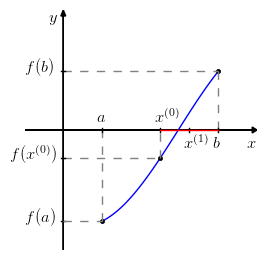

Uma forma prática de fazer esta verificação é testar se $f(a) \times f(b) < 0$.
A ideia então é descobrir um modo de ir encolhendo o intervalo que "cerca" a raiz. Podemos tomar como primeira aproximação da raiz o ponto médio do intervalo $[a, b]$,

$$
x^{(0)} = \frac{a+b}{2}.
$$

O valor da função neste ponto é $f(x^{(0)})$. Agora, se $f(x^{(0)}) \times f(a) < 0$ (ou seja, $f(x^{(0)})$ e $f(a)$ têm sinais opostos), então sabemos que a raiz $x^*$ está no intervalo $[a, x^{(0)}]$. Se não, temos que $f(x^{(0)}) \times f(b) < 0$, e $x^*$ está no intervalo $[x^{(0)}, b]$. Note que agora, a largura do intervalo caiu pela metade. Repetindo esta operação, podemos encontrar a aproximação seguinte, $x^{(1)}$, que, conforme a figura, cerca a raiz no intervalo $[x^{(0)}, x^{(1)}]$, diminuindo a largura do intervalo pela metade novamente. Podemos chegar muito próximos da raiz de $f(x)$ com um número modesto de iterações. Esta sequência de aproximações é o cerne do método da bisseção.

De fato, é mais conveniente definir o problema ao contrário. Ao invés de definir um número de iterações $N$, vamos especificar uma tolerância ou erro $\epsilon$, que é a largura do intervalo. Inicialmente, tomamos $n = 0$. Então fazemos

\begin{align}
a^{(n)} &= a,\\
b^{(n)} &= b,\\
x^{(n)} &= \frac{a^{(n)} + b^{(n)}}{2}.
\end{align}

Se a tolerância foi alcançada,

$$
\left| b^{(n)} - a^{(n)} \right| < \epsilon,
$$

então $x^{(n)}$ é a solução desejada, próxima o suficiente da raiz $x^*$. Se não, começamos outra iteração $n+1$. Testamos se

$$
f(x^{(n)}) \times f(a^{(n)}) < 0.
$$

Caso a condição seja verdadeira, $x^*$ está dentro do intervalo $[a^{(n)}, x^{(n)}]$, e precisamos "cercar" a raiz. Definimos então

\begin{align}
a^{(n+1)} &= a^{(n)}, \\
b^{(n+1)} &= x^{(n)}.
\end{align}

No caso contrário, $x^*$ está dentro do intervalo $[x^{(n)}, b^{(n)}]$, e definimos

\begin{align}
a^{(n+1)} &= x^{(n)}, \\
b^{(n+1)} &= b^{(n)}.
\end{align}

A nova aproximação agora é

$$
x^{(n+1)} = \frac{a^{(n+1)} + b^{(n+1)}}{2}.
$$

Voltamos a verificar o critério de parada, e iteramos este procedimento até que alcancemos a tolerância $\epsilon$. É sempre importante também limitar o número máximo de iterações, $N$, para evitar laços infinitos quando não houver convergência.
Repare que o método é descrito na forma de um algoritmo, sendo muito facilmente traduzido a código. 

### Exemplo 1

Vamos determinar a solução da equação

$$
\mathrm{e}^{x} = x + 2
$$

no intervalo $[-2, 0]$, com precisão $\epsilon = 10^{-5}$ (isto é, 5 casas decimais). Primeiro, vamo rescrever a equação como uma função

$$
f(x) = \mathrm{e}^{x} - x - 2.
$$

Como vimos, achar a solução da equação é equivalente a encontrar as raízes de $f(x)$. Vamos primeiro definir a função.

In [ ]:
import numpy as np

def f(x):
    return np.exp(x) - x - 2.0

Para descobrir o intervalo inicial, é sempre interessante fazer o gráfico da função.

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'

In [ ]:
fig, ax = plt.subplots()
x = np.linspace(-4, 2)
ax.plot(x, f(x), label=r'$f(x)$')
ax.axhline(0.0, ls='--', color='r', label=r'$y = 0$')
ax.set_ylabel(r'$y$')
ax.set_xlabel(r'$x$')
ax.legend()
plt.show()

Veja que há duas soluções, uma próxima de $-2$ e outra próxima de $1$. Vamos calcular a primeira solução fazendo o intervalo inicial $[a, b] = [-3, -1]$.

In [ ]:
n = 0
a = -3.0
b = -1.0
epsilon = 1e-5

print(f'f(a) = {f(a):.3f}')
print(f'f(b) = {f(b):.3f}')

Constatamos que $f(a)$ e $f(b)$ têm sinais opostos, então podemos começar a busca.
Vejamos se a nossa condição de parada, $\left| b - a \right| < \epsilon$, é satisfeita.

In [ ]:
delta = np.abs(b - a)
print(f'delta = {delta:.2f}')
print(f'parar? {delta < epsilon}')

Ainda não alcançamos a tolerância necessária. Neste caso, precisamos escolher em qual dos sub-intervalos devemos continuar a busca. Calculamos a aproximação seguinte.

In [ ]:
xn = (a + b) / 2.0
print(f'xn = {xn:.2f}, f(xn) = {f(xn)}')

if (f(a) * f(xn)) < 0:
    print('escolhemos o intervalo à esquerda.')
    b = xn
else:
    print('escolhemos o intervalo à direita.')
    a = xn

print(f'[a, b] = [{a:.2f}, {b:.2f}]')

delta = np.abs(b - a)
print(f'delta = {delta:.2f}')
print(f'parar? {delta < epsilon}')

### Exercício 1

Repita o procedimento descrito acima até atingir o nosso critério de parada dado pela tolerância $\epsilon$.

### Convergência da solução

Se tudo deu certo no Exercício 1, você encontrou a solução com cerca de 18 iterações.

A precisão do resultado melhora muito rapidamente com $N$, pois o intervalo diminui pela metade a cada passo. Se o tamanho inicial do intervalo é $\Delta = |b^{(0)} - a^{(0)}|$ , no passo seguinte é $\Delta^{(1)} = \Delta / 2$. Em $N$ passos, o tamanho do intervalo é $\Delta^{(N)} = \Delta / 2^N$. Conforme o nosso critério de parada, se quisermos parar em $N$ passos,

\begin{align}
\left| b^{(N)} - a^{(N)} \right| = \Delta^{(N)} &= \epsilon \\
\frac{\Delta}{2^N} &= \epsilon \\
2^N &= \frac{\Delta}{\epsilon}
\end{align}

Tomando o logaritmo de base 2 em ambos os lados,

$$
N = \log_2 \frac{\Delta}{\epsilon}
$$

No nosso exemplo, $\Delta = 2$ e $\epsilon = 10^{-5}$. O número estimado de passos é $N \approx 17.6$, concordando com o nosso resultado.

Mesmo se escolhermos uma precisão muito grande, como $\epsilon = 10^{-20}$, ainda assim precisamos apenas $N = 68$ passos para encontrar a raiz, uma quantidade bastante razoável para um computador executar praticamente de forma instantânea. Isso faz com que o método da bisseção seja um doa mais utilizados para determinar raízes de funções.

Mas, nem tudo são flores. Primeiro, é preciso já ter uma ideia de onde a solução ou raiz está. Pelo menos, precisamos de dois pontos $a$ e $b$ tais que $f(a)$ e $f(b)$ tenham sinais opostos. Isto nem sempre é fácil de obter. Um outro problema é que este método não encontra as chamadas raízes múltiplas, tais como as da função $f(x) = 1 - x^2$. As duas raízes são $x^* = 1$, mas a função apenas toca o eixo x, não o cruza. Logo, qualquer par de pontos $a$, à esquerda de $x^*$, e $b$, à direita de $x^*$, têm valor da função $f(x)$ positivo. Assim, $f(a) \cdot f(b) > 0$, mesmo com o intervalo $[a, b]$ cercando $x^*$. Neste caso, o método da bisseção não vai funcionar, precisamos de outro método.

### Exercício 2

A lei da radiação de Planck nos diz que a energia irradiada, por unidade de tempo, por unidade de área, por unidade de ângulo sólido e por unidade de comprimento de onda $\lambda$, de um corpo negro à temperatura $T$, é

$$
B(\lambda) = \frac{2 \pi h c^2 \lambda^{-5}}{\exp\left(\frac{hc}{\lambda k_\mathrm{B} T} \right) - 1}\ [\rm{J}\,\rm{s}^{-1}\,\rm{m}^{-2}\,\rm{sr}^{-1}\,\rm{m}^{-1}],
$$

onde $h$ é a constante de Planck, $c$ é a velocidade da luz, e $k_\mathrm{B}$ é a constante de Boltzmann. O seu gráfico, para $T = 5500 \,K$ é

In [ ]:
kB = 1.380649e-23 # [J/K]
h = 6.62607015e-34 # [J.s]
c = 299792458.0 # [m/s]

def B(l, T):
    n = 2 * np.pi * h * c**2 * l**-5
    d = np.exp(h * c / (l * kB * T)) - 1
    return n / d


fig, ax = plt.subplots()
ll = np.linspace(100.0e-9, 1000.0e-9)
ax.plot(ll / 1e-9, B(ll, T=5500.0), label=r'$B(\lambda), T= 5500\,K$')
ax.set_ylabel(r'$B(\lambda)$')
ax.set_xlabel(r'$\lambda [nm]$')
ax.legend()
plt.show()

O comprimento onde a intensidade é máxima é dado pela lei emprírica do deslocamento de Wien,

$$
\lambda_\mathrm{M} = \frac{b_\mathrm{W}}{T}.
$$

Podemos encontrar qual o valor da constante $b_\mathrm{W}$ calculando o ponto onde a Lei de Planck tem seu valor máximo. Para encontrar o ponto de máximo, diferenciamos $B(\lambda)$ com relação à $\lambda$, e tomamos o ponto $\lambda_\mathrm{M}$ onde a derivada é zero. Isto é

$$
5 \exp \left( - \frac{hc}{\lambda_\mathrm{M} k_\mathrm{B} T} \right) + \frac{hc}{\lambda_\mathrm{M} k_\mathrm{B} T} - 5 = 0.
$$

Precisamos encontrar o valor de $\lambda_\mathrm{M}$ que satisfaz esta equação. Podemos fazer a seguinte mudança de variáveis:

$$
x = \frac{hc}{\lambda_\mathrm{M} k_\mathrm{B} T},
$$

deixando a equação na forma

$$
5 \mathrm{e}^{-x} + x - 5 = 0.
$$

Veja que, da definção de $x$, já temos a lei de Wien, com a constante $b_\mathrm{W}$ dada por

$$
\lambda_M = \frac{hc}{x k_\mathrm{B} T} \\
\implies b_\mathrm{W} = \frac{hc}{x k_\mathrm{B}}.
$$

Basta apenas determinar $x$ usando o método da bisseção.

**a.** Defina a função $f(x) = 5 \mathrm{e}^{-x} + x - 5$.

**b.** Como ainda não temos ideia de onde fica a raiz desta função, é preciso plotá-la. Este é um trabalho manual, procure em alguns intervalos. Certifique-se de cercar a raiz, mas não se preocupe em chegar muito perto. Lembre que o método vai fazer esse serviço muito rapidamente!

*Nota: $x=0$ é uma raiz trivial, ela não nos interessa.*

**c.**  Use o método da bisseção, e encontre a solução com uma tolerância de $\epsilon = 10^{-10}$.

**d.** Calcule a constante de Wien,

$$
b_\mathrm{W} = \frac{hc}{x k_\mathrm{B}}.
$$

Use $k_\mathrm{B} = 1{,}380649 \times 10^{-23}\,\mathrm{J}\,\mathrm{K}^{-1}$, $h = 6{,}62607015 \times 10^{-34}\,\mathrm{J}\,\mathrm{s}$ e $c = 299792458\,\mathrm{m}\,\mathrm{s}^{-1}$.

**e.** Sabendo o comprimento de onda em que um objeto emite mais intensamente, podemos estimar a sua temperatura. Para o Sol, $\lambda_\mathrm{M} = 502\,\mathrm{nm}$. Calcule a sua temperatura usando a lei do deslocamento de Wien. Compare com a temperatura efetiva do Sol, determinada através da lei de Stefan–Boltzmann (fluxo $F =\sigma T_\text{eff}^4$), que é $T_\text{eff} = 5777\,\mathrm{K}$.